In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

def open_excel(xl_file, sheetname=None, parse_cols=[1, 2]):
    """
    This function serves as a thin wrapper around pandas.read_excel(). We use it to streamline the importation of 
    several spreadsheets at once.
    :param xl_file: The name of the spreadsheet to be opened.
    :param sheetname: The index-value or name of the sheet to be opened. None by default opens all worksheets.
    :param parse_cols: A list of index-values or names of columns to be read. By default reads the second and third columns.
    """

    # Read the excel spreadsheet and all worksheets within (sheetname=None)
    df_dict = pd.read_excel(xl_file, sheetname=sheetname, parse_cols=parse_cols)

    # Concatenate each of the separate worksheet DataFrames into a single DataFrame
    df = pd.concat([df_dict[k] for k in df_dict.keys()])
    
    # Drop null rows
    df = df.dropna(how='all')
    
    # Rename columns
    df.columns = ['idx', 'state']
    
    # Copy the date/time stamps to a new field
    df['time'] = df['idx']
    
    # Set the index and sort by date
    df = df.set_index('idx')
    df.index.rename(None, inplace=True)
    df = df.sort_index()
    
    # Look for "00" and drop rows
    # df.state.map('{:.0f}'.format)
    # Not implemented yet
               
    return df


# Now we call the function defined above and feed it a list of files we want to read
xl_files = ['Clark 2012.xlsx', 'Clark 2014.xlsx', 'Clark 2015.xlsx']
df_list = []
for xl_file in xl_files:
    df_list.append(open_excel(xl_file))
    
# Compile all of the yearly data together into a single DataFrame and sort by date
df = pd.concat(df_list)
df = df.sort_index()
print df

                     state                 time
2012-08-01 13:35:49      1  2012-08-01 13:35:49
2012-08-01 13:36:22      0  2012-08-01 13:36:22
2012-08-01 14:39:50      1  2012-08-01 14:39:50
2012-08-01 14:40:22      0  2012-08-01 14:40:22
2012-08-01 15:52:53      1  2012-08-01 15:52:53
2012-08-01 15:53:25      0  2012-08-01 15:53:25
2012-08-01 16:13:12      1  2012-08-01 16:13:12
2012-08-01 16:13:45      0  2012-08-01 16:13:45
2012-08-01 16:46:09      1  2012-08-01 16:46:09
2012-08-01 16:46:48      0  2012-08-01 16:46:48
2012-08-01 17:40:19      1  2012-08-01 17:40:19
2012-08-01 17:40:49      0  2012-08-01 17:40:49
2012-08-01 18:32:37      1  2012-08-01 18:32:37
2012-08-01 18:33:08      0  2012-08-01 18:33:08
2012-08-01 19:01:29      1  2012-08-01 19:01:29
2012-08-01 19:02:00      0  2012-08-01 19:02:00
2012-08-01 19:11:13      1  2012-08-01 19:11:13
2012-08-01 19:11:46      0  2012-08-01 19:11:46
2012-08-01 19:39:22      1  2012-08-01 19:39:22
2012-08-01 19:39:53      0  2012-08-01 1

In [2]:
len(df[df['state']==1])

30830

In [6]:
# Compute the time difference between subsequent records
time_diff = df.diff()
print time_diff

                     state     time
2012-08-01 13:35:49    NaN      NaN
2012-08-01 13:36:22     -1  0:00:33
2012-08-01 14:39:50      1  1:03:28
2012-08-01 14:40:22     -1  0:00:32
2012-08-01 15:52:53      1  1:12:31
2012-08-01 15:53:25     -1  0:00:32
2012-08-01 16:13:12      1  0:19:47
2012-08-01 16:13:45     -1  0:00:33
2012-08-01 16:46:09      1  0:32:24
2012-08-01 16:46:48     -1  0:00:39
2012-08-01 17:40:19      1  0:53:31
2012-08-01 17:40:49     -1  0:00:30
2012-08-01 18:32:37      1  0:51:48
2012-08-01 18:33:08     -1  0:00:31
2012-08-01 19:01:29      1  0:28:21
2012-08-01 19:02:00     -1  0:00:31
2012-08-01 19:11:13      1  0:09:13
2012-08-01 19:11:46     -1  0:00:33
2012-08-01 19:39:22      1  0:27:36
2012-08-01 19:39:53     -1  0:00:31
2012-08-01 19:58:30      1  0:18:37
2012-08-01 19:59:05     -1  0:00:35
2012-08-01 20:27:07      1  0:28:02
2012-08-01 20:27:38     -1  0:00:31
2012-08-01 20:39:44      1  0:12:06
2012-08-01 20:40:15     -1  0:00:31
2012-08-01 20:56:31      1  

In [7]:
# Since the data should be purely sequential (on/off) we can assume that all records with a state value of -1 correspond to 
# times when the pump was on and all records with a state value of 1 correspond to times when the pump was off.
pump_on = time_diff[time_diff['state']==-1]['time']
pump_off = time_diff[time_diff['state']==1]['time']
print pump_on

2012-08-01 13:36:22   00:00:33
2012-08-01 14:40:22   00:00:32
2012-08-01 15:53:25   00:00:32
2012-08-01 16:13:45   00:00:33
2012-08-01 16:46:48   00:00:39
2012-08-01 17:40:49   00:00:30
2012-08-01 18:33:08   00:00:31
2012-08-01 19:02:00   00:00:31
2012-08-01 19:11:46   00:00:33
2012-08-01 19:39:53   00:00:31
2012-08-01 19:59:05   00:00:35
2012-08-01 20:27:38   00:00:31
2012-08-01 20:40:15   00:00:31
2012-08-01 20:57:04   00:00:33
2012-08-01 21:13:02   00:00:32
2012-08-01 22:19:39   00:00:31
2012-08-01 22:58:24   00:00:30
2012-08-01 23:48:20   00:00:40
2012-08-02 00:00:13   00:00:33
2012-08-02 00:34:16   00:00:30
2012-08-02 01:42:16   00:00:30
2012-08-02 02:50:33   00:00:31
2012-08-02 04:01:12   00:00:31
2012-08-02 05:07:41   00:00:38
2012-08-02 05:09:55   00:00:41
2012-08-02 05:12:30   00:00:37
2012-08-02 05:37:45   00:00:31
2012-08-02 05:42:59   00:00:34
2012-08-02 05:46:40   00:00:35
2012-08-02 06:07:03   00:00:32
                        ...   
2015-08-31 22:28:27   00:00:29
2015-08-

In [4]:
# Aggregate the pump-on time by month and export to a .csv file
monthly_pump_runtime = pump_on.groupby([pd.TimeGrouper(freq='M')]).aggregate(np.sum).astype('timedelta64[s]')
monthly_pump_runtime.to_csv('runtime.csv')

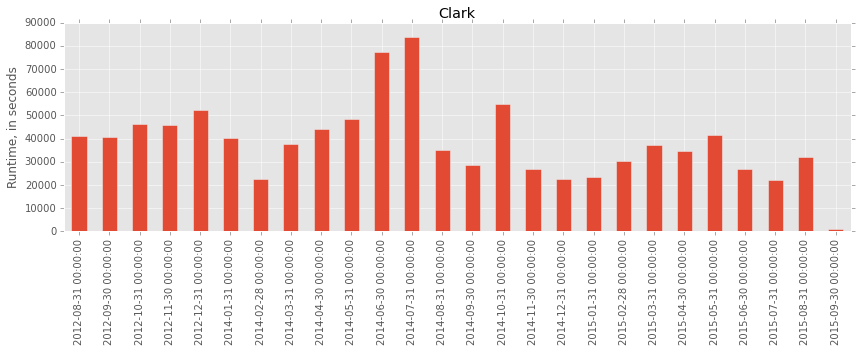

In [5]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 5))
monthly_pump_runtime.plot(kind='bar', ax=ax)
ax.set_ylabel('Runtime, in seconds')
plt.title('Clark')
plt.tight_layout()
plt.savefig('Clark.png')